In [29]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [30]:
n = 4

In [31]:
plt.plot([0.,5.], [5.,0.], 'b')

xtrain = np.array([[1., 3.], [3., 1.], [3.5, 3.], [2., 4.]])
plt.plot(xtrain[:, 0], xtrain[:, 1], 'b+')

In [32]:
d = np.zeros(n)
d = np.sign(xtrain[:,0] + xtrain[:,1] - 5)
d = d.reshape(n,1)
d

array([[-1.],
       [-1.],
       [ 1.],
       [ 1.]])

In [33]:
MyFirstNet = nl.net.newff([[0,5], [0,5]], [3,1]) #x1 and x2 => в скрытом слое 5 нейронов
y = MyFirstNet.sim(xtrain) #Даем обучающий пример
print(y)

[[-0.35577109]
 [-0.57045474]
 [ 0.46502942]
 [ 0.60872544]]


In [34]:
for i in range(n):
    if y[i] > 0:
        plt.plot(xtrain[i, 0], xtrain[i, 1], 'ro')
    if y[i] < 0:
        plt.plot(xtrain[i, 0], xtrain[i, 1], 'go')


In [35]:
err = MyFirstNet.train(xtrain, d, show=15)

The goal of learning is reached


In [36]:
#Опрос обученной сети
y = MyFirstNet.sim(xtrain)
for i in range(n):
    if y[i] > 0:
        plt.plot(xtrain[i, 0], xtrain[i, 1], 'ro')
    if y[i] < 0:
        plt.plot(xtrain[i, 0], xtrain[i, 1], 'go')


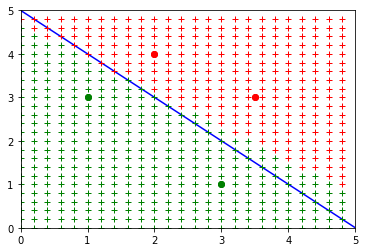

In [37]:
# Создние тестового множества

ntest = 25 * 25
xtest = np.zeros(ntest * 2)
xtest = xtest.reshape(ntest, 2)
i = 0
k0 = 0.
while k0 < 5:
    k1 = 0.
    while k1 < 5:
        xtest[i, 0] = k0
        xtest[i, 1] = k1
        i += 1
        k1 += 0.2
    k0 += 0.2


# Проверка способности сети к обобщению 
# сосчитает 655 точек

y = MyFirstNet.sim(xtest)
for i in range(ntest):
    if y[i] > 0:
        plt.plot(xtest[i, 0], xtest[i, 1], 'r+')
    if y[i] < 0:
        plt.plot(xtest[i, 0], xtest[i, 1], 'g+')
plt.axis([0, 5, 0, 5])
plt.show()
